<h1>Project DSCI 100-group-17</h1>
 Minecraft Data Analysis

In [2]:
library(dplyr)
library(tidyverse)
library(tidymodels)
library(tidyr)
library(repr)
library(readr)
library(rvest)
library(ggplot2)
library(hms)
library(lubridate)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   3.5.1     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yards

In [3]:
url <- "https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"
players_data <- read_csv(url) #load in the two datasets

players_data_df <- as.data.frame(players_data) #convert to a dataframe in order to wrangle
players_data_df

url <- "https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB"
session_data <- read_csv(url)

session_data_df <- as.data.frame(session_data) 
session_data_df

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA,NA
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA,NA
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA,NA
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19,NA,NA
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21,NA,NA
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17,NA,NA


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


In [38]:
#joining both datasets by hashedemail

merged_df <- left_join(players_data_df, session_data_df, by = "hashedEmail")|>
select(-individualId, -organizationName, -original_start_time, - original_end_time, -start_time, -end_time) |> 
filter(played_hours !=0)


sessions_number <- merged_df |>
group_by(name) |>
  summarise(number_of_sessions = n()) 

merged_df <- merged_df |>
  left_join(sessions_number, by = "name")

merged_df <- merged_df |>
  mutate(experience_numeric = case_when(
    experience == "Beginner" ~ 1,
    experience == "Amateur" ~ 2,
    experience == "Regular" ~ 3,
    experience == "Pro" ~ 4,
    experience == "Veteran" ~ 5))

merged_exp <- merged_df |>
  distinct(name, .keep_all=TRUE)

merged_fct <- merged_exp |> #Turn all explanatory variables into factors
mutate(experience_numeric = as_factor(experience_numeric)) |>
mutate(gender = as_factor(gender)) |>
mutate(subscribe = as_factor(subscribe))

#remove columns from dataset we dont need anymore. 
#hashed email and name are unique for each 
#indidivudal so we dont need both present, 
#and we dont need the old experience column

merged_final <- merged_fct |>
    select(-experience, -hashedEmail)

merged_final

subscribe,played_hours,name,gender,age,number_of_sessions,experience_numeric
<fct>,<dbl>,<chr>,<fct>,<fct>,<int>,<fct>
TRUE,30.3,Morgan,Male,9,27,4
TRUE,3.8,Christian,Male,17,3,5
TRUE,0.7,Flora,Female,21,1,2
TRUE,0.1,Kylie,Male,21,1,3
TRUE,0.1,Natalie,Male,17,1,2
TRUE,1.6,Lane,Female,23,3,5
TRUE,1.5,Sarah,Female,25,1,1
TRUE,0.2,Thatcher,Male,22,1,2
TRUE,48.4,Xander,Female,17,37,2


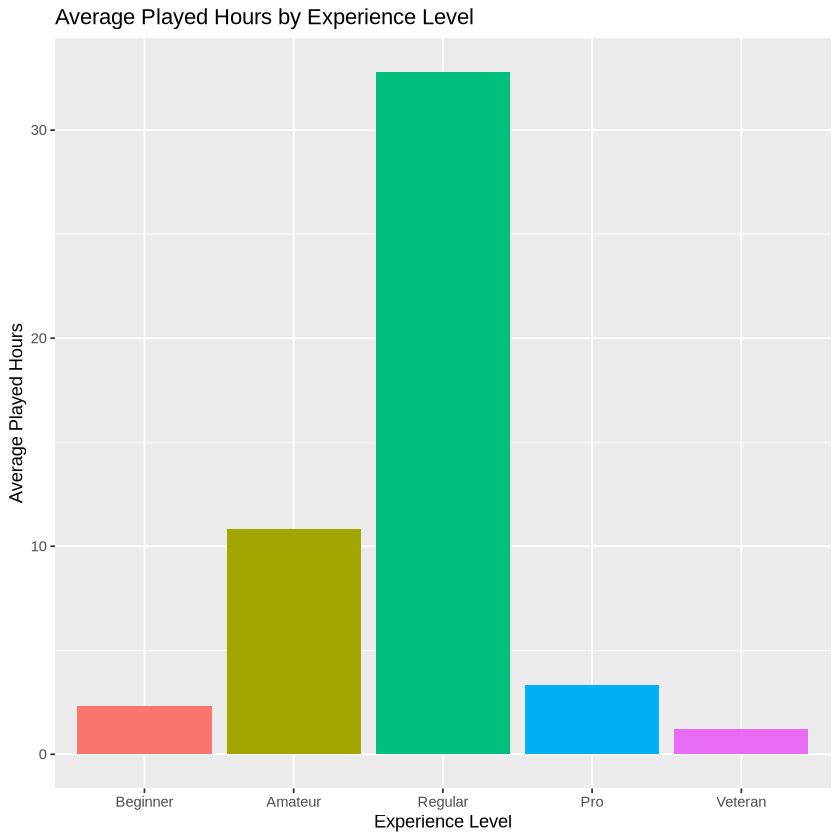

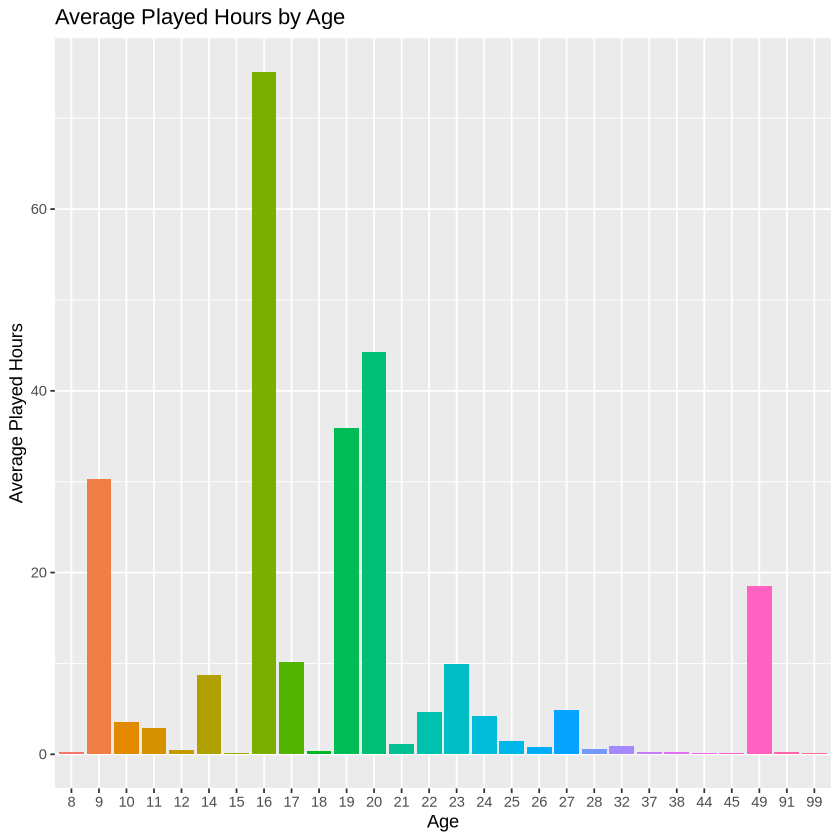

In [50]:


#  average played_hours by experience level
avg_played_hours <- merged_final |>
  group_by(experience_numeric) |> 
  summarise(avg_played_hours = mean(played_hours, na.rm = TRUE), .groups = "drop")

# Bar plot to visualize average played hours by experience level
ggplot(avg_played_hours, aes(x = experience_numeric, y = avg_played_hours, fill = experience_numeric)) +
  geom_bar(stat = "identity") +
  labs(title = "Average Played Hours by Experience Level",
       x = "Experience Level",
       y = "Average Played Hours") +
  scale_x_discrete(labels = c("Beginner", "Amateur", "Regular", "Pro", "Veteran")) +
theme(legend.position = "none")



 #avg age by hours      
avg_played_hours_by_age <- merged_final |>
  group_by(age) |>
  summarise(avg_played_hours = mean(played_hours, na.rm = TRUE))

# Bar plot: Average Played Hours by Age
ggplot(avg_played_hours_by_age, aes(x = age, y = avg_played_hours, fill = as.factor(age))) +
  geom_bar(stat = "identity") +
  labs(
    title = "Average Played Hours by Age",
    x = "Age",
    y = "Average Played Hours"
  ) +
 theme(legend.position = "none")

